In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta as td
import pandas as pd
%matplotlib inline
import sys
import easygui

import json


from nptdms import TdmsFile as TF

import importlib

import mhdpy.load as load
import mhdpy.analysis as analysis

mpl.rcParams.update({'font.size': 14})

datafolder = "C:\\Users\\aspit\\OneDrive\\Data\\"

In [43]:
folders = [datafolder + "\\2018-10-25\\Proj_VaporTubes\\Reprate_Pow\\",datafolder + "\\2018-10-26\\Proj_VaporTubes\\Reprate_40C\\",datafolder + "\\2018-10-26\\Proj_VaporTubes\\Reprate\\" ]

fps_PL = []
fps_pow = []
fps_T = []

for folder in folders:
    contents = os.listdir(folder)
    for content in contents:
        fname = os.path.splitext(content)[0]
        if 'PIMAX' in fname:
            fps_PL.append(os.path.join(folder,content))
        elif 'Powermeter' in fname:
            fps_pow.append(os.path.join(folder,content))
        elif 'TC1' in fname:
            fps_T.append(os.path.join(folder,content)) 

dfs_PL = load.common.create_tcdict(fps_PL,load.spe.spe2df_spect,prefixes = ['PIMAX_1_'])
dfs_pow = load.common.create_tcdict(fps_pow,load.common.tdms2df,prefixes = ['Log_Powermeter_0_','Log_Powermeter_1_'])
dfs_T = load.common.create_tcdict(fps_T,load.common.tdms2df,prefixes = ['Log_TC1_0_','Log_TC1_1_'])

regexs = {'Temperature' : '(\d+)C_', 'Power': '_(\d+)kV', 'Reprate': '_(\d+)Hz' }

# dfs_PL = load.common.tcdict2mi(dfs_PL, regexs)
# dfs_pow = load.common.tcdict2mi(dfs_pow, regexs)
# dfs_T = load.common.tcdict2mi(dfs_T, regexs)

# dfs_PL.sort_index(level = 'Temperature', inplace = True)
# dfs_pow.sort_index(level = 'Temperature', inplace = True)
# dfs_T.sort_index(level = 'Temperature', inplace = True)

filepath_EL = ['C:\\Users\\aspit\\OneDrive\\Data\\2018-10-25\\Eventlog.json']
with open(filepath_EL[0]) as read_file:
    eventlog = json.load(read_file)

Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object


C:\Users\aspit\AppData\Local\Continuum\anaconda3\lib\site-packages\nptdms\tdms.py:226: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  return pd.DataFrame.from_items(temp)


In [44]:
df = dfs_pow
df[list(df.keys())[0]]['/\'Meter 1\'/\'Power\'']

0      0.000160
1      0.000432
2      0.000525
3      0.000509
4      0.000528
5      0.000448
6      0.000447
7      0.000496
8      0.000432
9      0.000465
10     0.000415
11     0.000480
12     0.000450
13     0.000484
14     0.000487
15     0.000476
16     0.000445
17     0.000445
18     0.000460
19     0.000459
20     0.000392
21     0.000482
22     0.000469
23     0.000455
24     0.000422
25     0.000426
26     0.000409
27     0.000448
28     0.000445
29     0.000449
         ...   
486    0.000457
487    0.000465
488    0.000416
489    0.000462
490    0.000424
491    0.000460
492    0.000442
493    0.000367
494    0.000395
495    0.000448
496    0.000437
497    0.000413
498    0.000440
499    0.000418
500    0.000437
501    0.000462
502    0.000468
503    0.000428
504    0.000447
505    0.000432
506    0.000455
507    0.000453
508    0.000438
509    0.000426
510    0.000423
511    0.000454
512    0.000471
513    0.000455
514    0.000381
515    0.000460
Name: /'Meter 1'/'Power'

In [42]:
type(dfs_pow.loc[(60.0,12.0,128.0)])

pandas.core.series.Series

In [64]:
levelnum = 1
value = 14.0

dfs_PL_cut = dfs_PL.copy()
for testcase in dfs_PL_cut.index:
    dfs_PL_cut.loc[testcase][0] = analysis.trpl.cutspectraldf(dfs_PL.loc[testcase][0], 778,782)
    
print('Cross section of ' + dfs_PL_cut.index.names[levelnum] +" = " + str(value))
dfs_PL_cut = dfs_PL_cut.xs(value, level = levelnum)


dfs_T_cut = dfs_T.copy()
for testcase in dfs_T.index:
    dfs_T_cut.loc[testcase][0] = pd.DataFrame(dfs_T.loc[testcase][0]['/\'TC1\'/\'Temperature_0\''])
    
print('Cross section of ' + dfs_T_cut.index.names[levelnum] +" = " + str(value))
dfs_T_cut = dfs_T_cut.xs(value, level = levelnum)

dfs_pow_m1 = dfs_pow.copy()
for testcase in dfs_pow_m1.index:
    dfs_pow_m1.loc[testcase][0] = pd.DataFrame(dfs_pow.loc[testcase][0]['/\'Meter 1\'/\'Power\''])

print('Cross section of ' + dfs_pow_m1.index.names[levelnum] +" = " + str(value))
dfs_pow_m1 = dfs_pow_m1.xs(value, level = levelnum)
    
dfs_pow_m2 = dfs_pow.copy()
for testcase in dfs_pow_m2.index:
    dfs_pow_m2.loc[testcase][0] = pd.DataFrame(dfs_pow.loc[testcase][0]['/\'Meter 2\'/\'Power\''])
    
print('Cross section of ' + dfs_pow_m2.index.names[levelnum] +" = " + str(value))
dfs_pow_m2 = dfs_pow_m2.xs(value, level = levelnum)

Cross section of Power = 14.0


KeyError: "/'TC1'/'Temperature_0'"

In [34]:
def plotgrid(dfs, sel_col = None, squash = False, sharey = True, sharex = True, xlabel = "", ylabel = ""):
    #use colsel to select the column in the final dataframe to be plotted, if blank then plot all or series
    dfs = dfs.swaplevel(0,1).sort_index()

    levels = dfs.index.levels

    ncol = len(levels[0])
    nrow = len(levels[1])

    colname = levels[0].name
    rowname = levels[1].name
    
    if(squash):
        nrow = 1
    fig, axes = plt.subplots(nrow,ncol,sharey = sharey, sharex=sharex, figsize = (2*ncol,2*nrow))

    for i, col in enumerate(levels[0]):
        for j, row in enumerate(levels[1]):
            if len(axes.shape) == 1:
                ax = axes[i]
            else:
                ax = axes[j][i]
                
            if(i==0):
                ax.set_ylabel(rowname +": " +str(row)+ '\n\n'+ ylabel)
                
            if col in dfs.index:
                dfs_i = dfs.loc[col]

                if row in dfs_i.index:
                    trace = dfs_i.loc[row][0]
                    if(sel_col != None):
                        trace = trace[trace.columns[sel_col]]
                    ax.plot(trace, label = (col,row))

                if(j==0):
                    ax.set_title(colname + ": " + str(col))
                if(j==nrow-1):
                    ax.set_xlabel(xlabel)
    return fig, axes

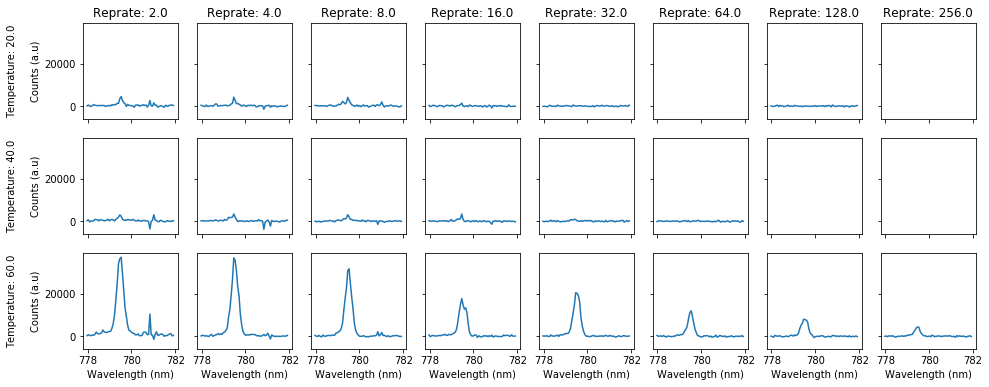

In [35]:
fig, axes = plotgrid(dfs_PL_cut,squash = False, sel_col = -1, xlabel = "Wavelength (nm)", ylabel = "Counts (a.u)")


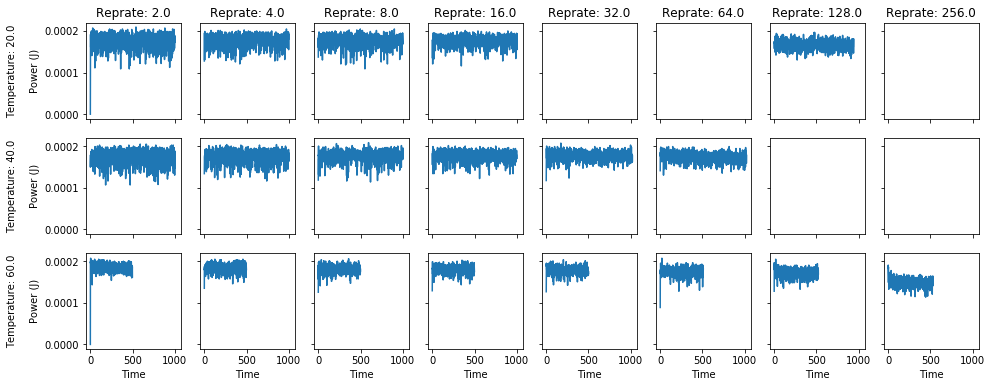

In [36]:
fig, axes = plotgrid(dfs_pow_m2,xlabel = "Time", ylabel = "Power (J)")

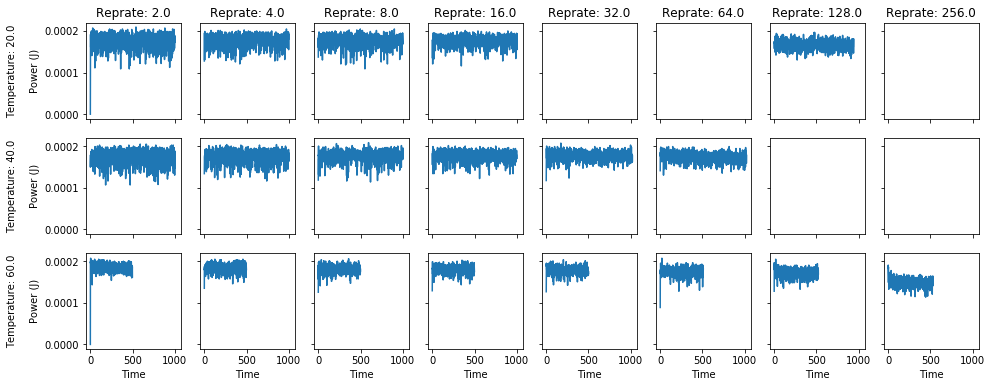

In [37]:
fig, axes = plotgrid(dfs_pow_m1,xlabel = "Time", ylabel = "Power (J)")

In [38]:
fig,axes = plotgrid(dfs_T_cut, sharex = False,xlabel = "Time", ylabel = "Temperature (C)")
fig.autofmt_xdate()

ValueError: setting an array element with a sequence

AttributeError: 'NoneType' object has no attribute 'seq'